In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# Importing clustering
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import cluster

In [2]:
countries = pd.read_csv("C:/Users/91779/Desktop/Country-data.csv")

In [3]:
print(len(countries))

167


In [4]:
# Let's check master dataset
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# analyze table
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# analyze table info
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
# Checking the percentage of missing values
round(100*(countries.isnull().sum()/len(countries.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [8]:
# Checking for outliers in the continuous variables
num_countries = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
num_countries.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [9]:
# Removing outliers
countries_WOName = countries.drop(['country'],axis=1)
countries_data = countries_WOName[(np.abs(stats.zscore(countries_WOName)) < 3).all(axis=1)]

In [10]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 166
Data columns (total 9 columns):
child_mort    153 non-null float64
exports       153 non-null float64
health        153 non-null float64
imports       153 non-null float64
income        153 non-null int64
inflation     153 non-null float64
life_expec    153 non-null float64
total_fer     153 non-null float64
gdpp          153 non-null int64
dtypes: float64(7), int64(2)
memory usage: 12.0 KB


In [11]:
# # Normalising continuous features
# df = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

# normalized_df=(df-df.mean())/df.std()
# countries_norm = countries.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
# countries_norm = pd.concat([countries_norm,normalized_df],axis=1)
# countries_norm.head()

In [12]:
standard_scalar = StandardScaler()
countries_NormData = standard_scalar.fit_transform(countries_data)

# PCA

In [13]:
pca = PCA(svd_solver='randomized', random_state=42)

In [14]:
#Doing the PCA on the company data
pca.fit(countries_NormData)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
pca.components_

array([[-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
        -0.22650995,  0.42715413, -0.40550525,  0.39482635],
       [ 0.03459073,  0.6327697 , -0.12933969,  0.7257587 , -0.07067406,
        -0.06317055, -0.14387869,  0.01853034, -0.15786626],
       [ 0.18299915, -0.25554275,  0.66457406,  0.25152297, -0.12332053,
        -0.5567656 , -0.18244321,  0.17127257,  0.09203817],
       [ 0.34760292,  0.26667437,  0.15444884, -0.08860929,  0.45993894,
         0.30990123, -0.19006785,  0.42255347,  0.50407451],
       [-0.22366393, -0.08811952,  0.57689406,  0.2178802 , -0.13508527,
         0.71277143,  0.05368612, -0.0894036 , -0.15736745],
       [ 0.05354957,  0.29421054,  0.19869989, -0.3552151 ,  0.04942437,
        -0.03553489, -0.63615054, -0.57141714, -0.10001314],
       [ 0.00091456, -0.56038917, -0.29999471,  0.46315184,  0.24684036,
         0.13004423, -0.37448883, -0.29824888,  0.27280168],
       [-0.77430348,  0.00447314, -0.03962214, -0.07430007,  0

In [16]:
#check variance
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

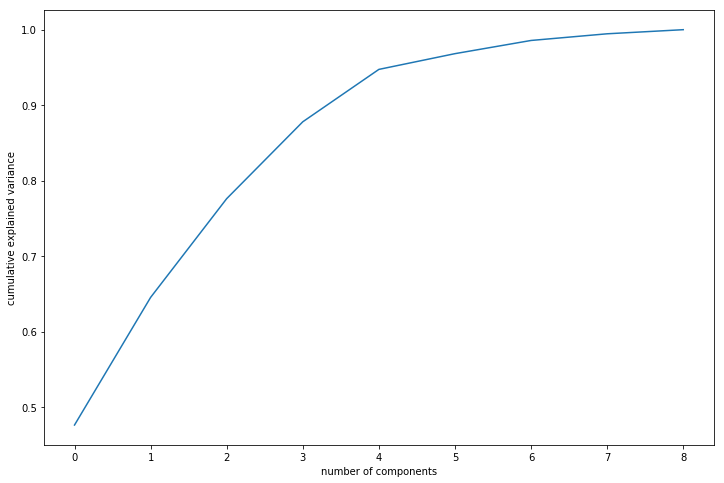

In [17]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [18]:
#  Check PC for each column
colnames = list(countries_WOName.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df

,Feature,PC1,PC2
0,child_mort,-0.423220,0.034591
1,exports,0.203604,0.632770
2,health,0.217542,-0.129340
3,imports,0.082910,0.725759
4,income,0.413693,-0.070674
5,inflation,-0.226510,-0.063171
6,life_expec,0.427154,-0.143879
7,total_fer,-0.405505,0.018530
8,gdpp,0.394826,-0.157866


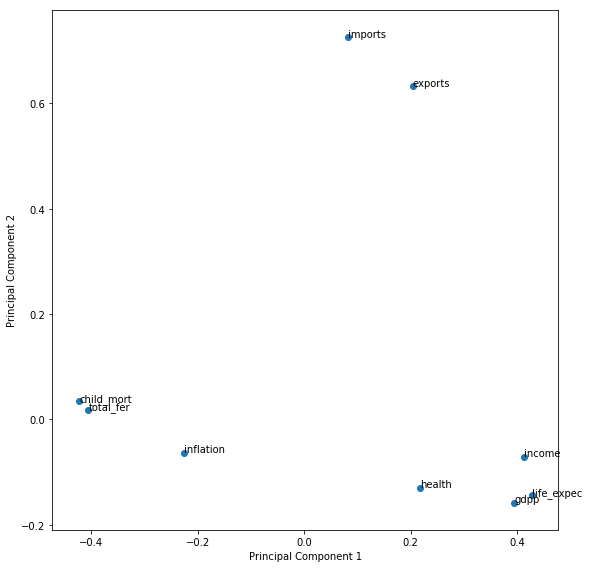

In [19]:
# Check column distribution across PC1 and PC2
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [20]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [21]:
df_pca = pca_final.fit_transform(countries_NormData)
df_pca.shape

(153, 5)

In [22]:
# creating transpose
pc=np.transpose(df_pca)
pcs_df2=pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})
pcs_df2.head()

,PC1,PC2
0,-3.130547,-0.470880
1,0.551826,-0.230450
2,-0.356180,-0.541263
3,-3.454452,1.115206
4,1.309048,0.612534


max corr: 9.441162254718294e-05 , min corr:  -0.00061081039695825


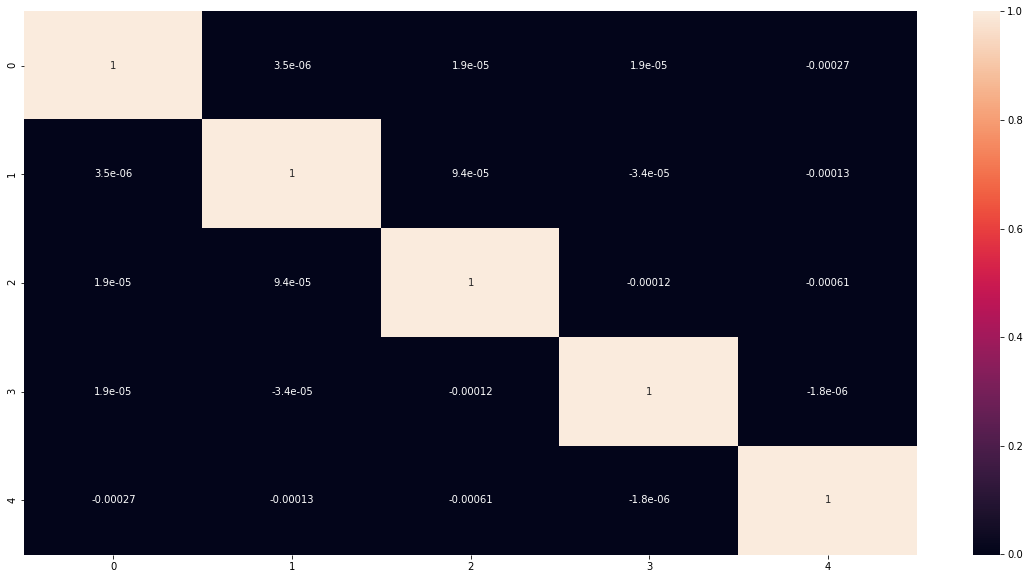

In [23]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

# check if correlations are indeed very close to 0
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

In [24]:
#check if our n is correct
pca_again = PCA(0.90)
df_pca2 = pca_again.fit_transform(countries_NormData)
df_pca2.shape

(153, 5)

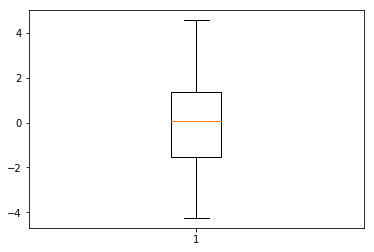

In [25]:
# Outlier Treatment

plt.boxplot(pcs_df2.PC1)
Q1=pcs_df2.PC1.quantile(0.05)
Q3=pcs_df2.PC1.quantile(0.95)
IQR=Q3-Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1>=Q1)&(pcs_df2.PC1<=Q3)]

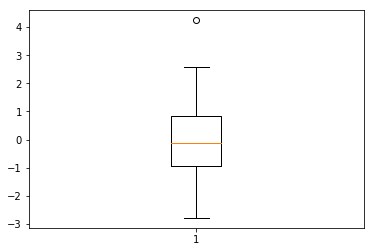

In [26]:
# Outlier Treatment

plt.boxplot(pcs_df2.PC2)
Q1=pcs_df2.PC2.quantile(0.05)
Q3=pcs_df2.PC2.quantile(0.95)
IQR=Q3-Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2>=Q1)&(pcs_df2.PC2<=Q3)]

In [27]:
pcs_df2.shape

(123, 2)

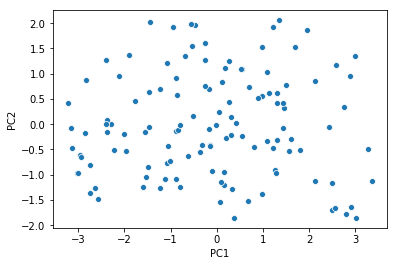

In [28]:
#visualization through scatterplot
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

# Clustering

# ---KMeans

In [29]:
# hopkins algo
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [30]:
# check is clustering can happen
hopkins(pcs_df2)

0.687158607831553

In [31]:
clust_df = pcs_df2

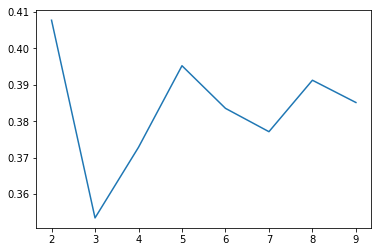

In [32]:
# Silhoutte Curve
sse_=[]
for k in range (2,10):
    kmeans = KMeans(n_clusters=k).fit(clust_df)
    sse_.append([k,silhouette_score(clust_df,kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

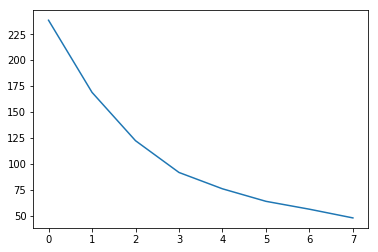

In [33]:
#elbow curve
ssd=[]
for num_clusters in list(range(2,10)):
    model_clus = KMeans(n_clusters=num_clusters,max_iter=50)
    model_clus.fit(clust_df)
    ssd.append(model_clus.inertia_)
plt.plot(ssd)

In [34]:
# consider k =5
model_clus2 = KMeans(n_clusters=5,max_iter=50,random_state=50).fit(clust_df)

In [35]:
# add cluster values
dat4 = pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4,pd.Series(model_clus2.labels_)],axis=1)
dat_km.columns = ['PC1','PC2','clusterID']
dat_km.head()

,PC1,PC2,clusterID
0,-3.130547,-0.470880,1
1,0.551826,-0.230450,4
2,-0.356180,-0.541263,4
3,1.309048,0.612534,3
4,-0.136042,-0.418479,4


In [36]:
dat_km['clusterID'].value_counts()

4    34
1    28
3    23
2    19
0    19
Name: clusterID, dtype: int64

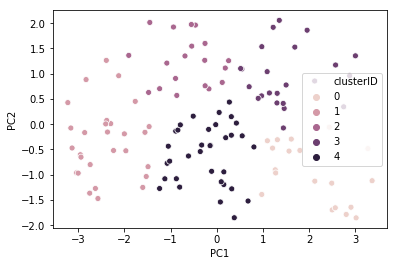

In [37]:
#visualization through scatterplot
sns.scatterplot(x='PC1',y='PC2',hue='clusterID',legend="full",data=dat_km)

In [38]:
dat5 = pd.concat([countries,dat_km], axis=1)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-3.130547,-0.470880,1.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.551826,-0.230450,4.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.356180,-0.541263,4.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.309048,0.612534,3.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.136042,-0.418479,4.0


In [39]:
dat6=dat5.drop(['PC1','PC2'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4.0


In [40]:
# calc mean across columns
clus_child_mort = pd.DataFrame(dat6.groupby(["clusterID"]).child_mort.mean())
clus_exports = pd.DataFrame(dat6.groupby(['clusterID']).exports.mean())
clus_health = pd.DataFrame(dat6.groupby(['clusterID']).health.mean())
clus_imports = pd.DataFrame(dat6.groupby(['clusterID']).imports.mean())
clus_income = pd.DataFrame(dat6.groupby(['clusterID']).income.mean())
clus_life_expec = pd.DataFrame(dat6.groupby(['clusterID']).life_expec.mean())
clus_total_fer = pd.DataFrame(dat6.groupby(['clusterID']).total_fer.mean())
clus_gdpp = pd.DataFrame(dat6.groupby(['clusterID']).gdpp.mean())
clus_inflation = pd.DataFrame(dat6.groupby(['clusterID']).inflation.mean())

In [41]:
df1 = pd.concat([pd.Series([0,1,2,3,4]),
clus_child_mort,clus_exports,clus_health,clus_imports,clus_income,clus_life_expec,clus_total_fer,clus_gdpp,clus_inflation],
axis=1)

In [42]:
df1.columns=[
'clusterID','clus_child_mort','clus_exports','clus_health','clus_imports','clus_income','clus_life_expec',
'clus_total_fer','clus_gdpp','clus_inflation']

In [43]:
df1

,clusterID,clus_child_mort,clus_exports,clus_health,clus_imports,clus_income,clus_life_expec,clus_total_fer,clus_gdpp,clus_inflation
0,0,42.542105,41.643158,8.267895,51.068421,15484.947368,69.836842,3.211579,12455.631579,7.073684
1,1,42.632143,32.349250,6.222857,43.541639,10666.714286,69.307143,3.047500,7520.321429,6.440500
2,2,27.431579,50.073684,6.678947,51.594737,16747.368421,71.952632,2.530526,12213.157895,10.372684
3,3,58.669565,36.534783,6.280000,40.547826,16746.043478,67.817391,3.435217,13960.739130,7.860304
4,4,32.952941,44.535294,6.704412,49.682353,20751.823529,72.311765,2.673824,16113.705882,7.043353


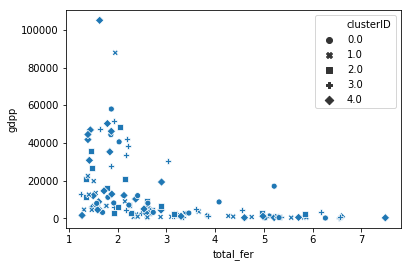

In [44]:
#visualization through scatterplot
sns.scatterplot(x='total_fer',y='gdpp',style="clusterID",data=dat6)

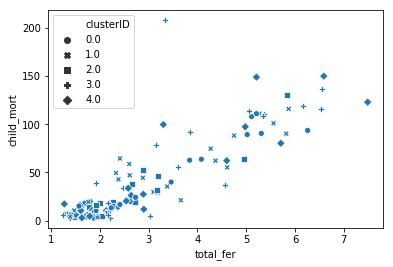

In [45]:
#visualization through scatterplot
sns.scatterplot(x='total_fer',y='child_mort',style="clusterID",data=dat6)

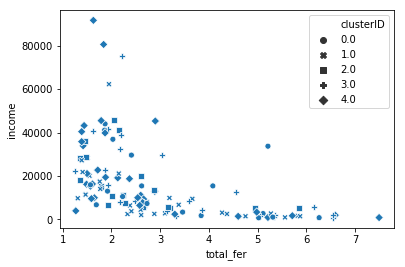

In [46]:
#visualization through scatterplot
sns.scatterplot(x='total_fer',y='income',style="clusterID",data=dat6)

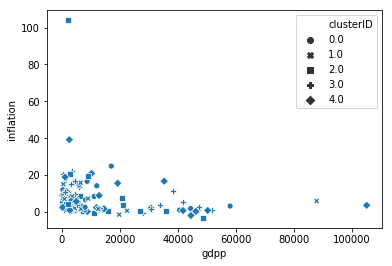

In [47]:
#visualization through scatterplot
sns.scatterplot(x='gdpp',y='inflation',style="clusterID",data=dat6)

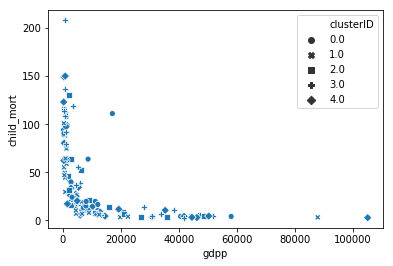

In [48]:
#visualization through scatterplot
sns.scatterplot(x='gdpp',y='child_mort',style="clusterID",data=dat6)

In [49]:
# checking cluster 2
clustertest= dat6[dat6['clusterID'] == 4]
clustertest.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,4.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,4.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,4.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,4.0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,4.0


# ---Hierarchical Clustering

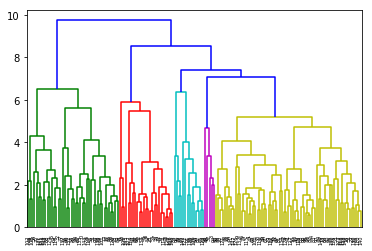

In [50]:
# Plot dendrogram to analyze what clustering should be done
merging = linkage(countries_NormData,method="complete",metric="euclidean")
dendrogram(merging)
plt.show()

In [51]:
# cut cluster with value =5
clusterCut = pd.Series(cluster.hierarchy.cut_tree(merging,n_clusters=5).reshape(-1,))

In [52]:
clusterCut.shape

(153,)

In [53]:
countries_hc = pd.concat([countries,clusterCut],axis=1)
countries_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.0


In [54]:
countries_hc.columns=['country','clus_child_mort','clus_exports','clus_health','clus_imports','clus_income','clus_inflation','clus_life_expec','clus_total_fer','clus_gdpp','clusterID']
countries_hc.head()

,country,clus_child_mort,clus_exports,clus_health,clus_imports,clus_income,clus_inflation,clus_life_expec,clus_total_fer,clus_gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.0


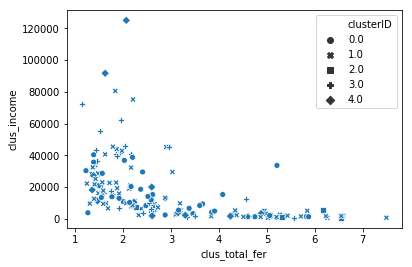

In [55]:
#visualization through scatterplot
sns.scatterplot(x='clus_total_fer',y='clus_income',style='clusterID',data=countries_hc)

In [56]:
# calc mean across columns with cluster id's
clusK_child_mort = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_child_mort.mean())
clusK_exports = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_exports.mean())
clusK_health = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_health.mean())
clusK_imports = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_imports.mean())
clusK_income = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_income.mean())
clusK_life_expec = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_life_expec.mean())
clusK_total_fer = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_total_fer.mean())
clusK_gdpp = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_gdpp.mean())
clusK_inflation = pd.DataFrame(countries_hc.groupby(['clusterID']).clus_inflation.mean())

In [57]:
df2 = pd.concat([pd.Series([0,1,2,3,4]),clusK_child_mort,clusK_exports,clusK_health,clusK_imports,clusK_income,clusK_life_expec,clusK_total_fer,clusK_gdpp,clusK_inflation],axis=1)
df2.columns=['clusterID','clus_child_mort','clus_exports','clus_health','clus_imports','clus_income','clus_life_expec','clus_total_fer','clus_gdpp','clus_inflation']

In [58]:
df2

,clusterID,clus_child_mort,clus_exports,clus_health,clus_imports,clus_income,clus_life_expec,clus_total_fer,clus_gdpp,clus_inflation
0,0,40.900000,38.609524,6.620476,45.983333,13365.666667,69.988095,3.049048,9221.142857,6.287881
1,1,38.011940,37.686866,6.899552,44.862687,15779.373134,70.937313,2.985522,11238.761194,8.422030
2,2,70.300000,61.220000,6.582000,65.600000,8627.800000,65.020000,4.328000,5682.600000,12.356000
3,3,33.296000,46.764360,7.075200,49.470636,25717.920000,72.504000,2.547600,23299.080000,5.365520
4,4,35.128571,49.433571,6.335714,57.085714,23211.428571,69.128571,2.727857,17071.714286,7.645786


In [59]:
countries_hc['clusterID'].value_counts()

1.0    67
0.0    42
3.0    25
4.0    14
2.0     5
Name: clusterID, dtype: int64

S:\AnacodaPy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


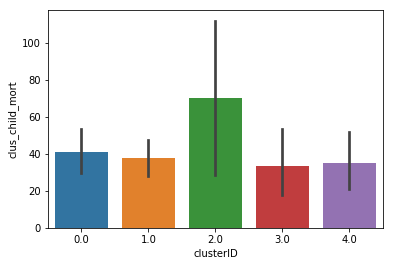

In [60]:
# visualization through bar graph
sns.barplot(x=countries_hc['clusterID'],y=countries_hc.clus_child_mort)

S:\AnacodaPy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


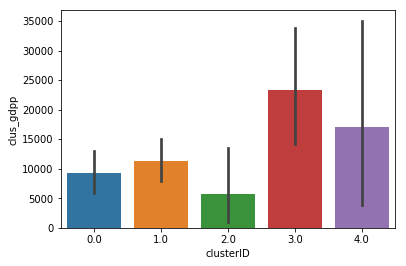

In [61]:
# visualization through bar graph
sns.barplot(x=countries_hc['clusterID'],y=countries_hc.clus_gdpp)

S:\AnacodaPy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


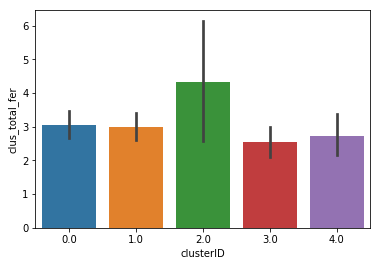

In [62]:
# visualization through bar graph
sns.barplot(x=countries_hc['clusterID'],y=countries_hc.clus_total_fer)

S:\AnacodaPy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


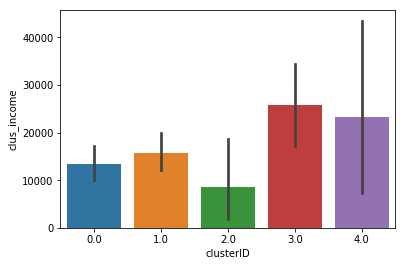

In [63]:
# visualization through bar graph
sns.barplot(x=countries_hc['clusterID'],y=countries_hc.clus_income)

In [64]:
# binning
fin=countries[countries['total_fer']>=2.54]
fin=fin[fin['income']<=8627]

In [65]:
# checking trend
fin.sort_values(by=['total_fer','child_mort'],ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231


In [66]:
# checking trend
fin.sort_values(by=['income'],ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446


In [67]:
# checking trend
fin.sort_values(by=['gdpp'],ascending=True).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [68]:
# checking cluster 2
cluster2= countries_hc[countries_hc['clusterID'] == 2]

In [69]:
cluster2.sort_values(by=['clus_gdpp'],ascending=True)

,country,clus_child_mort,clus_exports,clus_health,clus_imports,clus_income,clus_inflation,clus_life_expec,clus_total_fer,clus_gdpp,clusterID
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2.0
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,2.0
48,El Salvador,19.2,26.9,6.91,46.6,7300,2.65,74.1,2.27,2990,2.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.0
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,2.0


In [70]:
# binning 2
fin2=countries[countries['total_fer']<=2.54]
fin2=fin2[fin2['income']<=8627]

In [71]:
fin2.sort_values(by=['gdpp'],ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
164,Vietnam,23.3,72.000,6.84,80.2000,4490,12.10,73.1,1.95,1310
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240,16.50,68.8,2.34,1380
102,Moldova,17.2,39.200,11.70,78.5000,3910,11.10,69.7,1.27,1630
18,Bhutan,42.7,42.500,5.20,70.7000,6420,5.99,72.1,2.38,2180
140,Sri Lanka,11.2,19.600,2.94,26.8000,8560,22.80,74.4,2.20,2810
57,Georgia,16.5,35.000,10.10,52.8000,6730,8.55,72.8,1.92,2960
156,Ukraine,11.7,47.100,7.72,51.1000,7820,13.40,70.4,1.44,2970
48,El Salvador,19.2,26.900,6.91,46.6000,7300,2.65,74.1,2.27,2990


In [72]:
# Analyze all the 5 tables above and pick the countries which are performing poorly in all segments
# 5 countries in direst need are :
#     1. Congo, Dem. Rep.
#     2. Burundi
#     3. Niger
#     4. Liberia
#     5. Central African Republic